<a href="https://colab.research.google.com/github/AdamStajer07/pytorchTutorial/blob/main/PyTorchReview1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It's Review of PyTorch course

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.5.1+cu121'

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

In [5]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [6]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [7]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [11]:
epochs = 200

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | loss: {loss} | test_lossL {test_loss}')

Epoch: 0 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 10 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 20 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 30 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 40 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 50 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 60 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 70 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 80 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 90 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 100 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 110 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 120 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epoch: 130 | loss: 0.05761392042040825 | test_lossL 0.11862673610448837
Epo

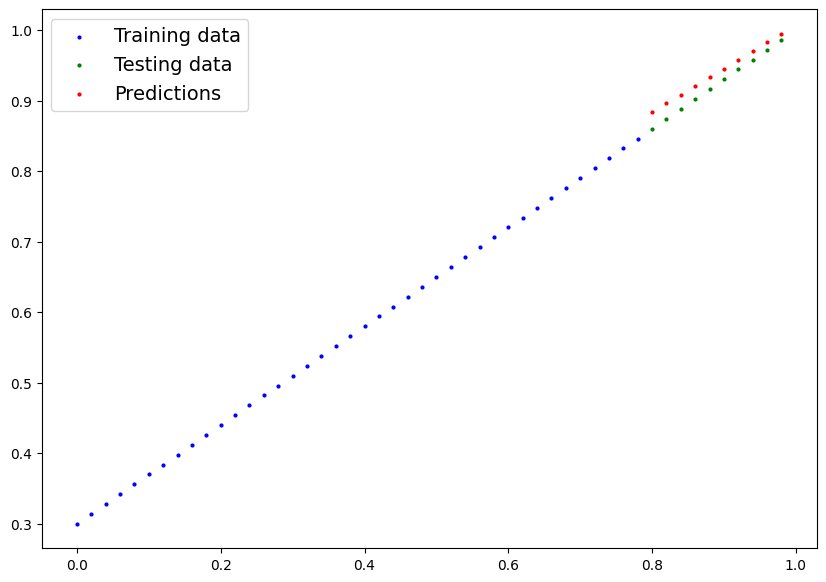

In [12]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions=y_preds.cpu())